# Artificial Neural Network




## Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.CustomerId.nunique()

10000

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
X = data.iloc[:, 3:13]  ### RowNumber, CustomerId, Surname are unique values and vulnarable for the dataset
y = data.iloc[:, 13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Now let's make the ANN!

In [13]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense           #A dense layer is just a regular layer of neurons in a neural network.Each neuron recieves input from all the neurons in the previous layer, thus densely connected. The layer has a weight matrix W, a bias vector b, and the activations of previous layer a
from keras.layers import LeakyReLU,PReLU,ELU          #Activation functions
from keras.layers import Dropout        #Regularization parameter

Using TensorFlow backend.


In [14]:
# Initialising the ANN
classifier = Sequential()

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(input_dim = 11, kernel_initializer = 'he_uniform',activation='relu',units = 6))
      #11 input features connected to the input layer, initialization parameter, activation functions, first hidden layer consist 6 neurons
           #as in xtrain 11 features are there           #how weights are initialized
         ## always equal to the input features   
            
# Adding the second hidden layer
classifier.add(Dense( kernel_initializer = 'he_uniform',activation='relu',units = 6))
                                                                          # second hidden layer consist 6 neurons

# Adding the output layer
classifier.add(Dense( kernel_initializer = 'glorot_uniform', activation = 'sigmoid',units = 1))
                      #glorot_uniform ,    sigmoid activation only suitable in output layer, output layer consist 1 neurons 
                    #      initialization used in output layer                                     coz of binary classification problem

In [16]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [17]:
#### With he_uniform and he_normal , the ReLU activation function works well 
### while glorot_uniform works well with sigmoid activation function which is used in output layer

In [18]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
                 #optimizer             loss function                  performance metrics
                                        #binary_crossentropy best for binary classification problem

In [19]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)
                                                             ## batch size used for minimize computation power as it will convert n data points into k batches

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 591us/step - loss: 0.5576 - accuracy: 0.7876 - val_loss: 0.5218 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 218us/step - loss: 0.5035 - accuracy: 0.7962 - val_loss: 0.4930 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 208us/step - loss: 0.4806 - accuracy: 0.7962 - val_loss: 0.4761 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 190us/step - loss: 0.4659 - accuracy: 0.7962 - val_loss: 0.4638 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 221us/step - loss: 0.4555 - accuracy: 0.7962 - val_loss: 0.4555 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 217us/step - loss: 0.4482 - accuracy: 0.7964 - val_loss: 0.4498 - val_accuracy: 0.7959
Epoch 7/100
5359/5359 [==============================] - 1s 233us/step

5359/5359 [==============================] - 1s 190us/step - loss: 0.3383 - accuracy: 0.8599 - val_loss: 0.3646 - val_accuracy: 0.8451
Epoch 57/100
5359/5359 [==============================] - 1s 199us/step - loss: 0.3382 - accuracy: 0.8586 - val_loss: 0.3642 - val_accuracy: 0.8459
Epoch 58/100
5359/5359 [==============================] - 1s 201us/step - loss: 0.3379 - accuracy: 0.8595 - val_loss: 0.3637 - val_accuracy: 0.8459
Epoch 59/100
5359/5359 [==============================] - 1s 193us/step - loss: 0.3377 - accuracy: 0.8593 - val_loss: 0.3636 - val_accuracy: 0.8466
Epoch 60/100
5359/5359 [==============================] - 1s 204us/step - loss: 0.3374 - accuracy: 0.8593 - val_loss: 0.3633 - val_accuracy: 0.8466
Epoch 61/100
5359/5359 [==============================] - 1s 194us/step - loss: 0.3373 - accuracy: 0.8597 - val_loss: 0.3632 - val_accuracy: 0.8466
Epoch 62/100
5359/5359 [==============================] - 1s 208us/step - loss: 0.3370 - accuracy: 0.8602 - val_loss: 0.3639 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


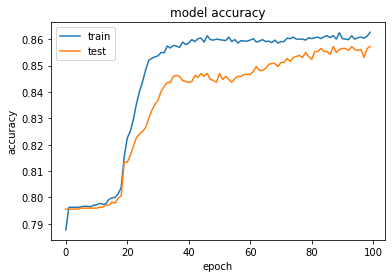

In [20]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

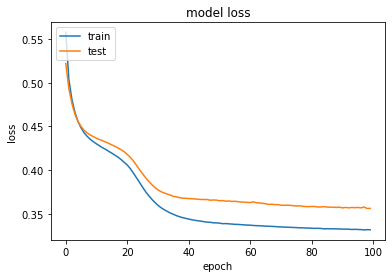

In [21]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 3 - Making the predictions and evaluating the model

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1501,   94],
       [ 199,  206]], dtype=int64)

In [24]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8535

In [25]:
### we get good training and testing accuracy so we don't make model overfitted.

## Add dropout and make new classifier with multiple permutaion combination to check accuracy

In [26]:
# Initialising the ANN
classifier1 = Sequential()



# Adding the input layer and the first hidden layer
classifier1.add(Dense(input_dim = 11, kernel_initializer = 'he_uniform',activation='relu',units = 8))
classifier1.add(Dropout(0.3))      #add random dropout rate in layers as a regularization parameters    
            
# Adding the second hidden layer
classifier1.add(Dense( kernel_initializer = 'he_normal',activation='relu',units = 7))
classifier1.add(Dropout(0.4)) 

# Adding the third hidden layer
classifier1.add(Dense( kernel_initializer = 'he_normal',activation='relu',units = 6))
classifier1.add(Dropout(0.2)) 
                                                                         

# Adding the output layer
classifier1.add(Dense( kernel_initializer = 'glorot_uniform', activation = 'sigmoid',units = 1))
                                                  

In [27]:
classifier1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 63        
_________________________________________________________________
dropout_2 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 48        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [28]:
# Compiling the ANN
classifier1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
                 #optimizer             loss function                  performance metrics
                                        #binary_crossentropy best for binary classification problem

In [29]:
# Fitting the ANN to the Training set
model_history=classifier1.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)
                                                             ## batch size used for minimize computation power as it will convert n data points into k batches

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 409us/step - loss: 0.6268 - accuracy: 0.7421 - val_loss: 0.5076 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 268us/step - loss: 0.5328 - accuracy: 0.7850 - val_loss: 0.4982 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 2s 289us/step - loss: 0.5034 - accuracy: 0.7923 - val_loss: 0.4829 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 246us/step - loss: 0.4940 - accuracy: 0.7946 - val_loss: 0.4749 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 237us/step - loss: 0.4820 - accuracy: 0.7960 - val_loss: 0.4619 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 253us/step - loss: 0.4788 - accuracy: 0.7962 - val_loss: 0.4602 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 279us/step

5359/5359 [==============================] - 1s 238us/step - loss: 0.4191 - accuracy: 0.7962 - val_loss: 0.3977 - val_accuracy: 0.7955
Epoch 57/100
5359/5359 [==============================] - 1s 238us/step - loss: 0.4178 - accuracy: 0.7960 - val_loss: 0.3985 - val_accuracy: 0.7955
Epoch 58/100
5359/5359 [==============================] - 1s 272us/step - loss: 0.4200 - accuracy: 0.7962 - val_loss: 0.4010 - val_accuracy: 0.7955
Epoch 59/100
5359/5359 [==============================] - 1s 269us/step - loss: 0.4299 - accuracy: 0.7962 - val_loss: 0.4088 - val_accuracy: 0.7955
Epoch 60/100
5359/5359 [==============================] - 1s 239us/step - loss: 0.4263 - accuracy: 0.7962 - val_loss: 0.4075 - val_accuracy: 0.7955
Epoch 61/100
5359/5359 [==============================] - 1s 234us/step - loss: 0.4171 - accuracy: 0.7962 - val_loss: 0.4011 - val_accuracy: 0.7955
Epoch 62/100
5359/5359 [==============================] - 1s 251us/step - loss: 0.4243 - accuracy: 0.7962 - val_loss: 0.4106 

In [30]:
## After applying dropout and add 1 more hidden layer doesn't increase my accuracy so previous model is perfecgt for our problem

In [31]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[[1501   94]
 [ 199  206]]
0.8535
